## 4.5 상호 작용과 다항식 

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline
font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc("font",family=font_name)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
import mglearn
X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1,1)

In [29]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree =10, include_bias = False)
# X ** 10 까지 고차항을 추가합니다.
# 기본값인 'include_bias = True'는 절편에 해당하는 1인 특성을 추가합니다. 
poly.fit(X)
X_poly = poly.transform(X)

#ohe = OneHotEncoder(sparse = False)
#ohe.fit(X)

In [30]:
print('X_poly.shape : ', X_poly.shape)

X_poly.shape :  (120, 10)


In [31]:
print('X 원소 :\n', X[:5])
print('X poly 원소 : \n', X_poly[:5])

X 원소 :
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X poly 원소 : 
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [32]:
print('항 이름 : \n', poly.get_feature_names())

항 이름 : 
 ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


C:\Users\A\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:1263: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for c in combinations)


C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


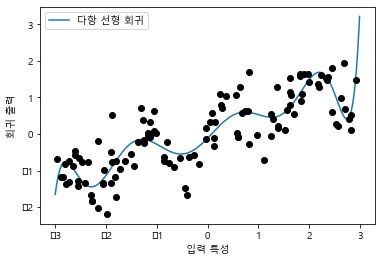

In [33]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label = '다항 선형 회귀')
plt.plot(X[:,0], y, 'o', c= 'k')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc = 'best')

C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


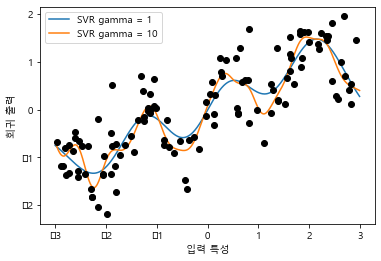

In [34]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma = gamma).fit(X,y)
    plt.plot(line, svr.predict(line), label = 'SVR gamma = {}'.format(gamma))
    
plt.plot(X[:, 0], y ,'o', c = 'k')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc = 'best')

In [35]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state = 0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print('X_train.shape :', X_train.shape)
print('X_train_poly.shape : ', X_train_poly.shape)

X_train.shape : (379, 13)
X_train_poly.shape :  (379, 105)


In [37]:
print('다항 특성 이름 :\n', poly.get_feature_names())

다항 특성 이름 :
 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


C:\Users\A\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:1263: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for c in combinations)


In [39]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print('상호작용 특성 없을 때 점수 : {:.3f}'.format(ridge.score(X_test_scaled, y_test)))

ridge = Ridge().fit(X_train_poly, y_train)
print('상호작용 특성 있을 때 점수 : {:.3f}'.format(ridge.score(X_test_poly, y_test)))

상호작용 없을 때 점수 : 0.621
상호작용 없을 때 점수 : 0.753


In [42]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print('상호작용 특성 없을 때 점수 : {:.3f}'.format(rf.score(X_test_scaled, y_test)))

rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
print('상호작용 특성 있을 때 점수 : {:.3f}'.format(rf.score(X_test_poly, y_test)))

상호작용 특성 없을 때 점수 : 0.795
상호작용 특성 있을 때 점수 : 0.773


* 특성을 추가하지 않아도 랜덤 포레스트는 릿지의 성능보다 낫다.
* 상호작용과 다항식을 추가하면 성능이 조금 떨어진다.
* 제곱, 세제곱~~ 항을 추가하면 선형 회귀 모델에 도움이 된다.

# 4.6 단변량 비선형 변환
* 제곱 세제곱~ 항을 추가하면 선형 회귀 모델에 도움이 됨을 알았다.
* log, exp, sin 같은 수학 함수를 적용하는 방법도 특성 변환에 유용함.
* 트리기반 모델은 트리 순서에만 영향을 주나, 선형 모델과 신경망은 각 특서으이 스케일과 분포에 밀접하게 연관됨
* 대부분의 모델은 각 특성이 정규 분포와 비슷할 때 최ㄱ의 성능을 낸다.

In [43]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size = (1000, 3))
w = rnd.normal(size = 3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print(X[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


In [44]:
print("특성 출현 횟수 : \n", np.bincount(X[:, 0]))

특성 출현 횟수 : 
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, '값')

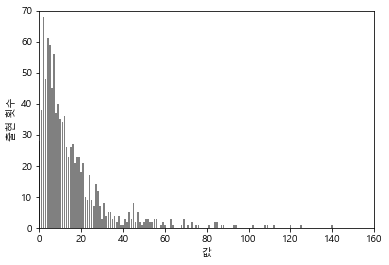

In [45]:
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)), bins, color = 'grey')
plt.ylabel('출현 횟수')
plt.xlabel('값')

* 위 데이터에 릿지 회귀 적용해보기

In [46]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state = 0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print('테스트 점수 :{:.3f}'.format(score))



테스트 점수 :0.622


In [47]:
X_train_log = np.log(X_train +1)
X_test_log = np.log(X_test +1)

Text(0.5, 0, '값')

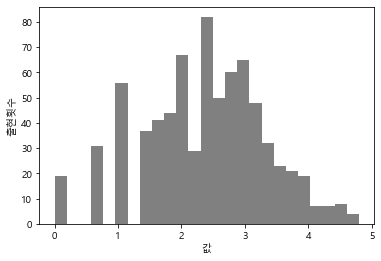

In [48]:
plt.hist(X_train_log[:,0], bins = 25, color = 'gray')
plt.ylabel('출현횟수')
plt.xlabel('값')

In [49]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("테스트 점수 : {:.3f}".format(score))

테스트 점수 : 0.875


* 데이터 셋과 모델의 조합에 최적인 변환 방법을 찾기란 예술에 가깝다 
* 일부특성만 변환하거나 특성마다 모두 다르게 변환하기도 한다.
* 트리기반 모델은 스스로 상호작용을 찾고, 대부분의 경우 데이터를 명시적으로 변환하지 않아도 된다. 
* svm 최근접이웃, 신경망 같은 모델은 선형보다는 영향이 뚜렷하지 않다. 

# 4.7 특성 자동 선택 
* 고차원 데이터셋 사용시, 가장 유용한 특성만 사용하고 나머지는 무시하는게 좋다. 따라서 자동으로 특성을 선택해주는 기능을 사용해본다.
* 일변량 통계, 모델 기반 선택, 반복적 선택
* 지도 학습이므로 최적값을 위해 target값이 반드시 필요하다

* 사이킷 런에서 일변량 분석으로 특성을 선택하려면
* 분류 :f_classif 회귀 : f_regression 선택
* SelectPercentile  -> 지정된 특성만큼 선택 

In [50]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

In [53]:
rng = np.random.RandomState(42)
noise = rng.normal(size = (len(cancer.data), 50))
#고정된 난수를 발생시키고, 데이터에 노이즈 특성을 추가한다.
#처음 30개는 원본 특성이고 다음 50개가 노이즈 특성

X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state = 0, test_size = .5)

# f_classif(기본값)과 SelectPernectile 을 사용해 특성의 50%를 선택한다.

select = SelectPercentile(score_func = f_classif, percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print("X_train.shape : ", X_train.shape)
print("X_train_selected. shape : ", X_train_selected.shape)

X_train.shape :  (284, 80)
X_train_selected. shape :  (284, 40)


C:\Users\A\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


* 특성의 개수가 80개에서 40개로 줄었다. 

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


C:\Users\A\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


([<matplotlib.axis.YTick at 0x16f7f9ae080>],
 <a list of 1 Text major ticklabel objects>)

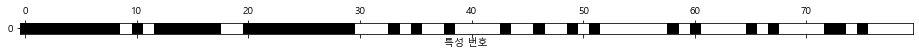

In [54]:
mask = select.get_support()
print(mask)
#True 검은색, False 흰색 으로 마스킹
plt.matshow(mask.reshape(1,-1), cmap ='gray_r')
plt.xlabel('특성 번호')
plt.yticks([0])

In [55]:
from sklearn.linear_model import LogisticRegression

X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print('전체 특성을 사용한 점수 : {:.3f}'.format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print('선택된 일부  특성을 사용한 점수 : {:.3f}'.format(lr.score(X_test_selected, y_test)))


전체 특성을 사용한 점수 : 0.930
전체 특성을 사용한 점수 : 0.940


C:\Users\A\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


* 일부 원본 특성이 없더라도, 노이즈 특성을 제거하여 select한 쪽의 성능이 더높다. 
* 인위적으로 만든 예제이고, 실제 데이터에서의 결과는 보통 엇갈리는 경우도 많으나, 
* 너무많은 특성 때문에 모델을 만들기가 현실적으로 어려울 때 일변량 분석을 사용하여 특성을 선택하면 큰 도움이 될 수 있다. 

## 4.7.2 모델 기반 특성 선택

* selectfromModel 은 중요도가 지정한 임계치보다 큰 모든 특성을 선택
* 일변량 분석으로 선택한 특성과 결과를 비교하기 위해 절반 가량의 특성이 선택될 수 있도록 중간값을 임계치로 사용
* 트리 100개로 만든 랜덤 포레스트 분류기를 사용해 특성 중요도를 계산한다.

In [61]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators = 100, random_state = 42),
    threshold = "median")# 임계치 -> median

In [62]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)

print('X_train.shape:', X_train.shape)
print('X_train_l1.shape', X_train_l1.shape)

X_train.shape: (284, 80)
X_train_l1.shape (284, 40)


Text(0.5, 0, '특성 번호')

C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


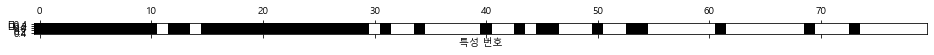

In [63]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap ='gray_r')
plt.xlabel('특성 번호')


* RandomForestClassfier 을 사용한 SelectFromModel 이 선택한 특성
* 특성 50개를 선택하도록 지정했으며, 일부 노이즈 특성도 포함되어 있다. 

In [64]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print('테스트 점수 :{:.3f}'.format(score))

테스트 점수 :0.951


* 특성 선택이 더 잘되어 성능도 조금 향상되었다. 

## 4.7.3 반복적 특성 선택

* 모든 특성을 대상으로 모델을 만든뒤, 특성 중요도가 낮은 특성을 제거해가지면서 다시! 모델을 만드는 재귀적 특성제거 방법 활용

Text(0.5, 0, '특성 번호')

C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


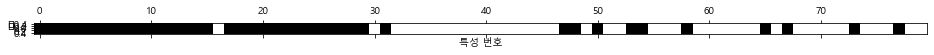

In [67]:
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators = 100, random_state = 42),
            n_features_to_select = 40)

select.fit(X_train, y_train)# 유방암 데이터 + 노이즈 데이터 50개
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel("특성 번호")

* 일변량 분석이나, 모델 기반 선택보다 특성 선택이 나아졌지만, 여전히 특성 한개를 놓쳤다. 
* 랜덤 포레스트 모델은 톡성이 누락 될 때마다 다시 학습하므로, 40 번이나 실행된다. 
* RFE를 사용해서 특성을 선택했을 때의 로지스틱 회귀의 정확도를 확인해보겠다. 

In [69]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print('테스트 점수 : {:.3f}'.format(score))


테스트 점수 : 0.951


*  결과적으로, 머신러닝 알고리즘에 어떤 입력값을 넣을지 확신이 안선다면 특성 자동 선택이 도움될 수 있다. 
* 또한, 예측 속도를 높이거나 해석하기 더 쉬운 모델을 만드는데 필요한 만큼 특성의 수를 줄이는 데에도 효과적
* 대부분의 실전에서 특성 선택이 큰 성능 향상을 끌어내진 못하나, 머신러닝 기술자에겐 여전히 중요한 도구이다!

# 4.8 전문가 지식 활용

In [71]:
citibike = mglearn.datasets.load_citibike()
print('시티바이크 데이터 :\n', citibike.head())

시티바이크 데이터 :
 starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0, 0.5, '횟수')

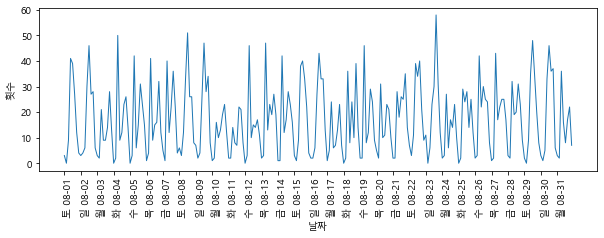

In [76]:
plt.figure(figsize = (10,3))
xticks = pd.date_range(start = citibike.index.min(), end = citibike.index.max(), freq ='D')
week = ['일', '월','화','수','목','금','토']
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime("%w"),
                                             xticks.strftime(" %m-%d"))]
plt.xticks(xticks, xticks_name, rotation = 90, ha = 'left')
plt.plot(citibike, linewidth = 1)
plt.xlabel('날짜')
plt.ylabel('횟수')

* citibike 데이터 훈련셋과 테스트 셋으로 나눠 모델을 만들어보기

In [84]:
y = citibike.values
X = citibike.index.astype("int64").values.reshape(-1,1)#POSIX 시간을 10**9로 나뉘어 변환
n_train = 184 # 트레인 데이터 포인트 -> 나머지가 테스테셋 

In [91]:
def eval_on_feature(feature, target, regressor):
    X_train, X_test = feature[:n_train], feature[n_train:]
    
    y_train, y_test = target[:n_train], target[n_train:]
    
    regressor.fit(X_train, y_train)
    print('테스트 셋 스코어 : {:.2f}'.format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize = (10,3))
    
    plt.xticks(range(0, len(X), 8), xticks_name, rotation = 90, ha = 'left')
    
    plt.plot(range(n_train), y_train, label = '훈련')
    plt.plot(range(n_train, len(y_test) + n_train),y_test,'-', label = '테스트')
    plt.plot(range(n_train),y_pred_train,'--', label = '훈련예측')
    plt.plot(range(n_train, len(y_test) + n_train),y_pred,'--', label = '테스트 예측')
    plt.legend(loc = (1.01,0))
    plt.xlabel('날짜')
    plt.ylabel('대여횟수')


테스트 셋 스코어 : -0.04


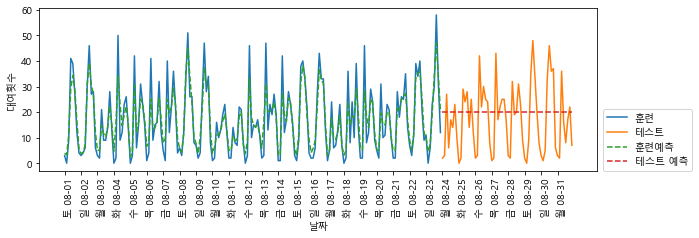

In [92]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_feature(X, y, regressor)

* 시간 데이터(POSIX)만 피쳐로 가져와서 만든 랜덤 포레스트의 citybike data 예측
* 테스트셋 스코어가 -0.04 => 거진 아무것도 학습되지 않았다. -> 랜덤 포레스트와 특성 사이의 조합에 문제가 있다!
* 테스트 셋에 있는 데이터 포인트는 전부 훈련셋의 데이터보다 뒤에있는 시간적 데이터 이다.
* 트리모델인 랜덤 포레스트는 특히나 훈련셋에 있는 특성 범위 밖으로 외삽(Extrapolation)할 수 있는 능력이 없다.
* 따라서 이모델에선 테스트 셋과 가장 가까이 있는 마지막 훈련 셋 데이터의 타깃값을 예측으로사용하게됨

테스트 셋 스코어 : 0.60


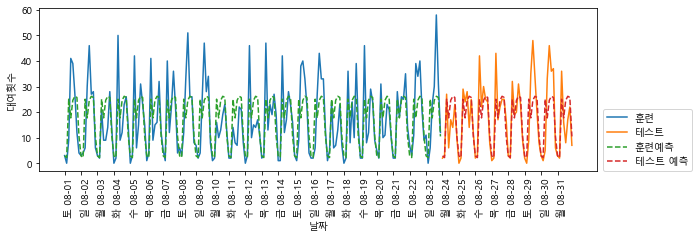

In [93]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_feature(X_hour, y, regressor)

* POSIX 시간으론 아무것도 학습되지않으니 시간만 사용해서 출력해본 결과이다. 테스트 셋 스코어가 훨씬 나아졌지만, 주간패턴에 대해 파악 불가.

테스트 셋 스코어 : 0.84


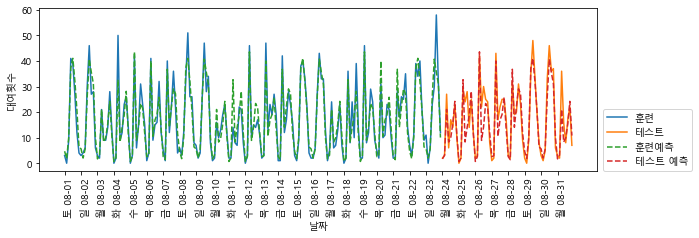

In [95]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1,1),
                        citibike.index.hour.values.reshape(-1,1)])
# 요일 정보 추가하기 
eval_on_feature(X_hour_week, y, regressor)

* 요일 정보를 추가한 후, 하루의 시간과 요일에 따른 주기적 패턴을 따르게 된다. 테스트셋스코어는 0.84로 상당히 좋은 예측 성능을 내었다.
* 이모델이 학습한것 -> 8/23일까지의 요일별, 시간별 평균 대여 횟수 

테스트 셋 스코어 : 0.13


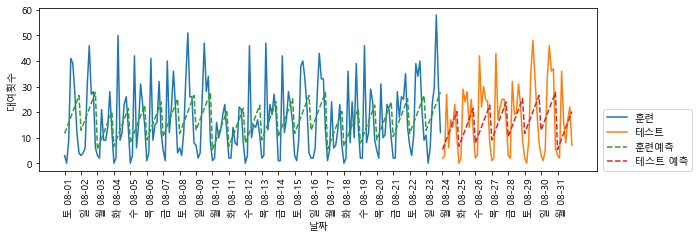

In [97]:
from sklearn.linear_model import LinearRegression
eval_on_feature(X_hour_week,y, LinearRegression())
#선형회귀 모델 사용해보기 

* 요일과 시간이 정수로 인코딩되어, 연속형 변수로 해석되기 때문에 선형 모델의 성능에 맞지않다. 
* 선형 모델은 시간을 선형 함수로만 학습할 수 있어, 하루에서 시간이 흐륵수록 대여 수가 늘어나게 학습되어 있다. -> 실제패턴은 더복잡
* 패턴을 잡아내기 위해 OneHotEncoder 사용-> 정수형을 범주형으로 해석해보기 

테스트 셋 스코어 : 0.62


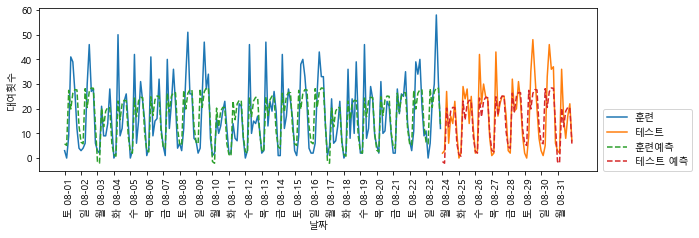

In [99]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
eval_on_feature(X_hour_week_onehot, y, Ridge())

* 연속성 변수보다, OneHotEncoder를 이용해 범주형으로 변환시 더 성능이 좋아진다. 
* 선형모델은 요일마다 하나의 계수, 시간마다도 하나의 계수를 학습하고, 이말은 모든 시간패턴이 모든날에 걸쳐 공유된다는 것.

테스트 셋 스코어 : 0.85


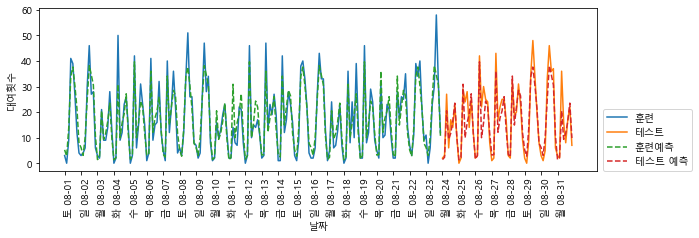

In [102]:
poly_transformer = PolynomialFeatures(degree = 2, interaction_only = True, include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
#상호 작용 특성을 사용-시간과 요일의 조합별 계수를 학습
# 시간과 요일의 곱을 특성으로 사용해서 만든 선형회귀
lr = Ridge()
eval_on_feature(X_hour_week_onehot_poly, y, lr)

* 상호작용 특성(PolynomialFeatures)을 사용해 시간과 요일의 조합별 계수를 학습시켜본 결과
* 이런 특성변환을 통해 모델의 성능이 랜덤포레스트와 거의 비슷해 졌으며, 이러한 모델의 장점은 무엇이 학습되었는가가 명확하다.
* 랜덤포레스트와 달리 이 모델이 학습한 계수를 그래프로 표현가능

C:\Users\A\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:1263: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for c in combinations)


([<matplotlib.axis.XTick at 0x16f01284c18>,
 [Text(0, 0, '월'),
  Text(0, 0, '화'),
  Text(0, 0, '수'),
  Text(0, 0, '목'),
  Text(0, 0, '금'),
  Text(0, 0, '토'),
  Text(0, 0, '일'),
  Text(0, 0, '00:00'),
  Text(0, 0, '03:00'),
  Text(0, 0, '06:00'),
  Text(0, 0, '09:00'),
  Text(0, 0, '12:00'),
  Text(0, 0, '15:00'),
  Text(0, 0, '18:00'),
  Text(0, 0, '21:00'),
  Text(0, 0, '월 00:00'),
  Text(0, 0, '월 03:00'),
  Text(0, 0, '월 06:00'),
  Text(0, 0, '월 09:00'),
  Text(0, 0, '월 12:00'),
  Text(0, 0, '월 15:00'),
  Text(0, 0, '월 18:00'),
  Text(0, 0, '월 21:00'),
  Text(0, 0, '화 00:00'),
  Text(0, 0, '화 03:00'),
  Text(0, 0, '화 06:00'),
  Text(0, 0, '화 09:00'),
  Text(0, 0, '화 12:00'),
  Text(0, 0, '화 15:00'),
  Text(0, 0, '화 18:00'),
  Text(0, 0, '화 21:00'),
  Text(0, 0, '수 00:00'),
  Text(0, 0, '수 03:00'),
  Text(0, 0, '수 06:00'),
  Text(0, 0, '수 09:00'),
  Text(0, 0, '수 12:00'),
  Text(0, 0, '수 15:00'),
  Text(0, 0, '수 18:00'),
  Text(0, 0, '수 21:00'),
  Text(0, 0, '목 00:00'),
  Text(0, 0, '

C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


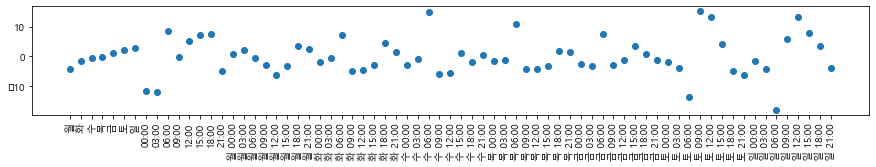

In [103]:
hour = ["%02d:00" % i for i in range(0,24,3)]
day = ["월", "화","수","목", "금","토","일"]
feature = day+hour
feature_poly= poly_transformer.get_feature_names(feature)
feature_nonzero = np.array(feature_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]
plt.figure(figsize= (15,2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), feature_nonzero, rotation = 90)

* 선형 모델에서 학습한 계수 표현